In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
from datetime import datetime
end = datetime.now()
start = datetime(end. year-20, end.month, end.day)

In [3]:
# start = '2012-01-01'
# end = '2022-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
import yfinance as yf

ticker = yf.Ticker("GOOG")
data = ticker.history(start="2012-01-01", end="2024-12-24")
print(data.head())

                                Open       High        Low      Close  \
Date                                                                    
2012-01-03 00:00:00-05:00  16.185880  16.562924  16.171749  16.495001   
2012-01-04 00:00:00-05:00  16.485582  16.614982  16.376262  16.566147   
2012-01-05 00:00:00-05:00  16.413692  16.459304  16.267435  16.336349   
2012-01-06 00:00:00-05:00  16.339823  16.360895  16.107796  16.113499   
2012-01-09 00:00:00-05:00  16.026237  16.038633  15.399813  15.430305   

                              Volume  Dividends  Stock Splits  
Date                                                           
2012-01-03 00:00:00-05:00  147611217        0.0           0.0  
2012-01-04 00:00:00-05:00  114989399        0.0           0.0  
2012-01-05 00:00:00-05:00  131808205        0.0           0.0  
2012-01-06 00:00:00-05:00  108119746        0.0           0.0  
2012-01-09 00:00:00-05:00  233776981        0.0           0.0  


In [5]:
    data.reset_index(inplace=True)

In [6]:
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2012-01-03 00:00:00-05:00,16.185880,16.562924,16.171749,16.495001,147611217,0.0,0.0
1,2012-01-04 00:00:00-05:00,16.485582,16.614982,16.376262,16.566147,114989399,0.0,0.0
2,2012-01-05 00:00:00-05:00,16.413692,16.459304,16.267435,16.336349,131808205,0.0,0.0
3,2012-01-06 00:00:00-05:00,16.339823,16.360895,16.107796,16.113499,108119746,0.0,0.0
4,2012-01-09 00:00:00-05:00,16.026237,16.038633,15.399813,15.430305,233776981,0.0,0.0
...,...,...,...,...,...,...,...,...
3260,2024-12-17 00:00:00-05:00,198.304075,202.649131,196.466172,196.895676,24129500,0.0,0.0
3261,2024-12-18 00:00:00-05:00,196.606015,198.463899,189.064604,189.933609,27638400,0.0,0.0
3262,2024-12-19 00:00:00-05:00,193.060059,194.378564,189.304343,189.484131,26981200,0.0,0.0
3263,2024-12-20 00:00:00-05:00,186.797176,193.914068,186.157905,192.740417,45319700,0.0,0.0


In [7]:
ma_100_days = data.Close.rolling(100).mean()

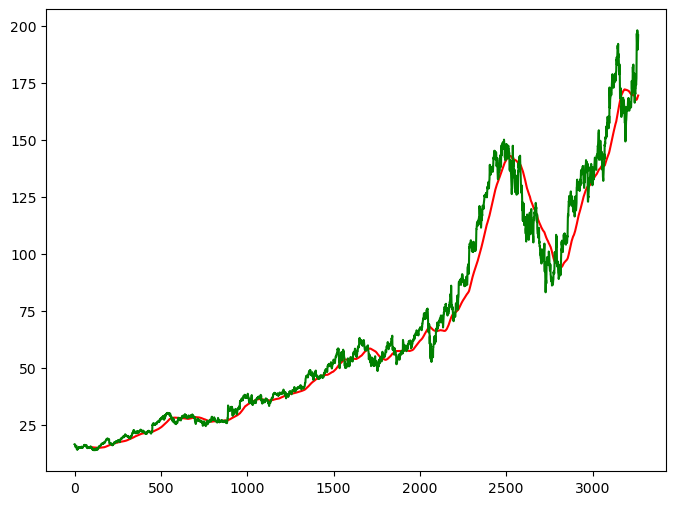

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [9]:
ma_200_days = data.Close.rolling(200).mean()

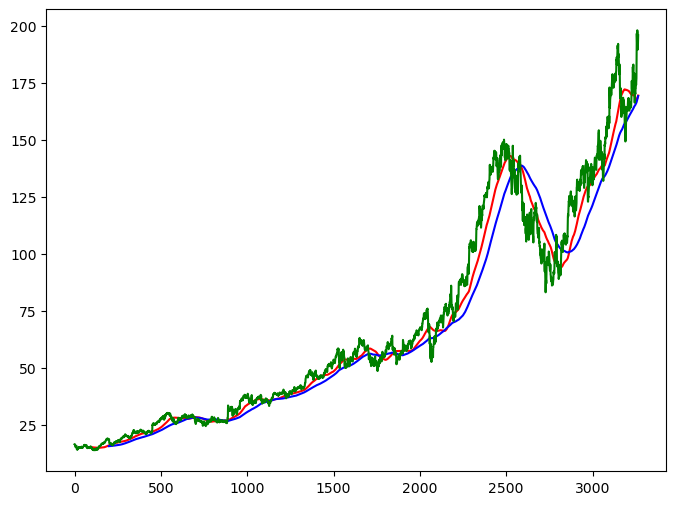

In [10]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [11]:
data.dropna(inplace=True)

In [12]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [13]:
data_train.shape[0]

2612

In [14]:
data_test.shape[0]

653

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
data_train_scale = scaler.fit_transform(data_train)

In [17]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [18]:
x, y = np.array(x), np.array(y)

In [19]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [20]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

2025-05-09 17:25:45.797168: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-05-09 17:25:45.797193: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-05-09 17:25:45.797199: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-05-09 17:25:45.797388: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-05-09 17:25:45.797674: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [21]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50


In [1]:
model.summary()

NameError: name 'model' is not defined

In [ ]:
pas_100_days = data_train.tail(100)

In [ ]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [ ]:
data_test_scale  =  scaler.fit_transform(data_test)

In [ ]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [ ]:
y_predict = model.predict(x)

In [ ]:
scale =1/scaler.scale_

In [ ]:
y_predict = y_predict*scale

In [ ]:
y = y*scale

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
model.save('Stock Predictions Model.keras')